#### Nguyễn Tiến Dũng

*KSTN Toán Tin - K62 **

20170062

*Đại học Bách khoa Hà Nội*

In [1]:
import processviz as pvz

**Câu 1:**

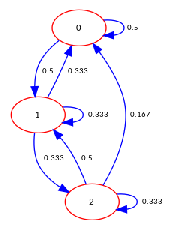

In [2]:
G = pvz.MarkovChain()
G.from_file('input.csv')
G._get_nth_matrix_state(100)
G.generate_graph()

**Câu 2:**

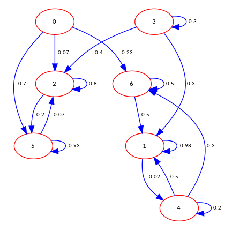

In [3]:
H = pvz.MarkovChain()
H.from_file('input_2.csv')
H.generate_graph()

*a.* Từ đồ thị trên ta thấy có các lớp liên thông là $\{3\}, \{1, 4, 6\}, \{2, 5\}$.

In [4]:
H.get_connected_component()

[['1', '4', '6'], ['2', '5'], ['3']]

*b*. Chu trình của mỗi trạng thái

In [5]:
for i in H.state:
    print('d(',i,') = : ', H.get_period(i))

d( 0 ) = :  0
d( 1 ) = :  1
d( 2 ) = :  1
d( 3 ) = :  1
d( 4 ) = :  1
d( 5 ) = :  1
d( 6 ) = :  1


---

**Câu 3:** Từ đề bài ta có vector phân phối $\lambda^{(0)} = [0.1,0.3,0.4,0.2]$ và ma trận xác suất chuyển

$$
P = \left[\begin{matrix}
0.04&0.32&0.32&0.32\\
\frac{0.98}{3} &0.02&\frac{0.98}{3}&\frac{0.98}{3}\\
\frac{0.94}{3}&\frac{0.94}{3}&0.06&\frac{0.94}{3}\\
0.04&0.04&0.04&0.88
\end{matrix}\right]
$$

In [6]:
G3 = pvz.MarkovChain()
G3.from_file('input_3.csv')
G3.get_connected_component()

[['A', 'B', 'C', 'D']]

Như vậy tháng tiếp theo phân phối thị phần của khu dân cư là $\lambda^{(2)} = [0.1332, 0.1466, 0.1583, 0.5616]$

---

*b.* Tìm phân phối dừng $\lambda$

In [7]:
G3.get_steady_state()

array([0.09090191, 0.08904677, 0.092836  , 0.72721531])

---

**Câu 4:** Các bước để tìm chu kì của một trạng thái được chia thành các bước như sau

1. Tìm các thành phần liên thông
2. Sử dụng thuật toán `DFS` để tìm một chu trình từ một đỉnh bất kì. Ghi lại độ dài chu trình này.

**Tìm các thành phần liên thông trong đồ thị**

Sử dụng chương trình từ những bài trước gồm kiểm tra đường đi từ trạng thái $i$ đến $j$

```python
def get_connected_component(self):
        connected_component = [[]]
        status = {i: False for i in self.state}
        while True:
            counter = 0
            for i in self.state:
                for j in self.state:
                    if (self.is_connected(i, j) and self.is_connected(j, i)):
                        if status[i] == False:
                            connected_component[counter].append(i)
                            status[i] = True
                        if status[j] == False:
                            connected_component[counter].append(j)
                            status[j] = True
                connected_component.append([])
                counter += 1
            if i == self.state[len(self.state) - 1] and j == self.state[len(self.state) - 1]:
                break
        connected_component = list(filter(None, connected_component))
        return connected_component
```

**Tìm chu trình của một trạng thái $i$** 

*Bổ đề:* Xét $I$ là `irreducible` có $n$ trạng thái, khi đó ta có $d(i) = \underset{i \in I}{gcd}\{t(i) | p_{ii}^{(t(i))} > 0\}$ với $t(i)$ là số nhỏ nhất để $p_{ii}^{(t(i))} > 0$

---

*Chứng minh:* 

Đầu tiên ta chỉ ra rằng $d(i) = \underset{i \in I}{gcd}\{t(i)\}$. Điều này hiển nhiên khi dựa vào định nghĩa của chu kì $d(i) | \underset{n\ge 1}{gcd}\{n | p_ii^{(n)} > 0\}$ và $d(i) = d(j)$

Ta sẽ chứng minh $t|d(i)$. Dễ thấy $t(i)$ là số nhỏ nhất thỏa mãn điều kiện trên nên $t(i) \le d(i)$

Từ đó ta suy ra $d(i) = t$.

---

Sau khi đã có các thành phần liên thông của xích, ta tìm thành phần liên thông chứa trạng thái $i$, sau đó tính $t(i)$ của từng thời điểm bất kì ta lấy `gcd` của chúng để được chu kì.

```python
    def get_period(self, source):
        component = self.get_connected_component()
        for container in component:
            if source in container:
                break
        t = []
        for i in container:
            t.append(self.cycle_length(i))
        return gcd(t)
```

---

> **Remark:** Em cho rằng nhận xét trên là đúng do `BFS` cho ra `shortest path` trên đồ thị không có trọng số

**Ví dụ:** Xét $I = [0,1,2,3]$ và ma trận chuyển trạng thái $P = \left[\begin{matrix}0&0.1&0&0.9&0\\0.2&0&0.8&0\\0&0.3&0&0.7\\0.4&0&0.6&0\end{matrix}\right]$

In [8]:
I = ['0','1','2','3']
P = [[0,0.1,0,0.9],[0.2,0,0.8,0],[0,0.3,0,0.7],[0.4,0,0.6,0]]
T = pvz.MarkovChain()
T.from_stdin(state=I, data=P)

for i in I:
    print('d(',i,'): ', T.get_period(i))

d( 0 ):  2
d( 1 ):  2
d( 2 ):  2
d( 3 ):  2


---

**Câu 5:**

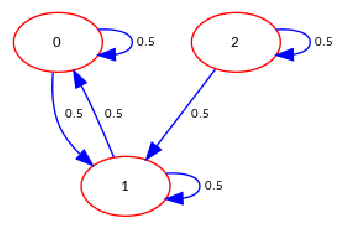

In [9]:
R = pvz.MarkovChain()
R.from_file('input_4.csv')
R.generate_graph()

In [10]:
R.get_steady_state()

array([0.5, 0.5, 0. ])

In [15]:
R.get_connected_component()

[['0', '1'], ['2']]

In [16]:
R.is_regular()

False